In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
tawfikelmetwally_automobile_dataset_path = kagglehub.dataset_download('tawfikelmetwally/automobile-dataset')

print('Data source import complete.')


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/automobile-dataset/Automobile.csv


In [3]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and array handling
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns  # For statistical data visualization and enhanced plots

import warnings  # To handle and control warnings during code execution

# Ignore all warnings to prevent them from cluttering the output
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.linear_model import LinearRegression  # Linear Regression model for predicting continuous values
from sklearn.preprocessing import PolynomialFeatures  # For generating polynomial features
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating regression models

In [4]:

# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv("/kaggle/input/automobile-dataset/Automobile.csv")
df.head()
# Display the first few rows of the DataFrame to get an overview of the data
df.head()


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [5]:
# Generate descriptive statistics for numerical columns in the DataFrame
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
# Display the names of all columns in the DataFrame
df.columns

Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [7]:
# Display a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
# Check for missing values in each column of the DataFrame
df.isnull().sum()

,0
name,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0


In [9]:
# Fill null values in 'horsepower' with the mean of the column
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

# Alternatively, fill null values with the median of the column
# df['horsepower'].fillna(df['horsepower'].median(), inplace=True)


In [10]:
# Check for missing values in each column of the DataFrame
df.isnull().sum()

,0
name,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0


In [11]:
# Select columns with string (object) data type from the DataFrame
string_cols = df.select_dtypes(include=['object']).columns

# Convert string columns to integers
for col in string_cols:
    # Factorize each string column to convert string values to unique integers
    df[col] = pd.factorize(df[col])[0]

In [12]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,0,18.0,8,307.0,130.0,3504,12.0,70,0
1,1,15.0,8,350.0,165.0,3693,11.5,70,0
2,2,18.0,8,318.0,150.0,3436,11.0,70,0
3,3,16.0,8,304.0,150.0,3433,12.0,70,0
4,4,17.0,8,302.0,140.0,3449,10.5,70,0


In [13]:
# Compute the pairwise correlation of columns in the DataFrame
df.corr()


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,1.000000,0.561060,-0.351711,-0.376328,-0.371839,-0.319283,0.234127,0.899361,0.115458
mpg,0.561060,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.482619
cylinders,-0.351711,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.551378
displacement,-0.376328,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.591137
horsepower,-0.371839,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.442222
weight,-0.319283,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.521088
acceleration,0.234127,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.257365
model_year,0.899361,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.075409
origin,0.115458,0.482619,-0.551378,-0.591137,-0.442222,-0.521088,0.257365,0.075409,1.000000


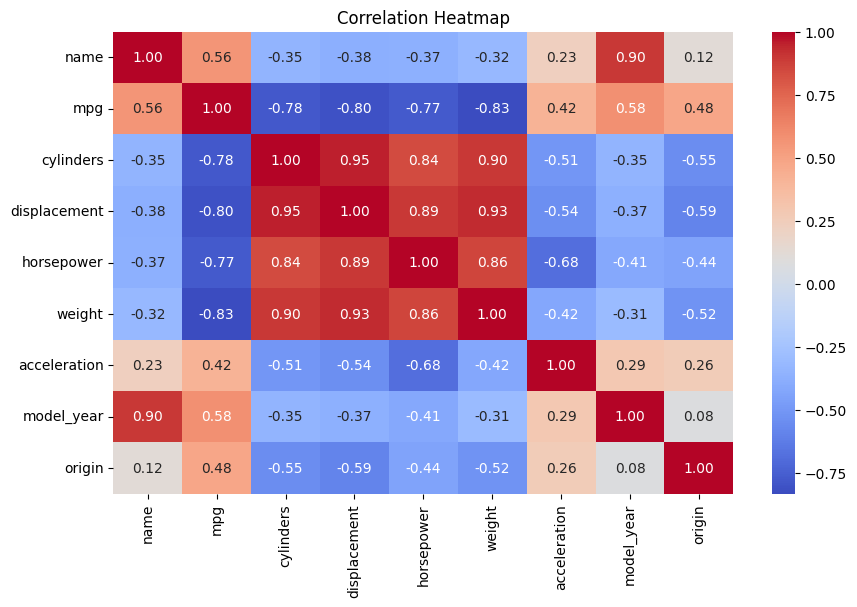

In [14]:
# Set the size of the figure for the plot
plt.figure(figsize=(10, 6))

# Create a heatmap to visualize the correlation matrix of the DataFrame
# `df.corr()` computes the correlation matrix
# `annot=True` adds the correlation coefficients on the heatmap
# `cmap='coolwarm'` specifies the color map to use
# `fmt=".2f"` formats the correlation coefficients to two decimal places
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()


In [15]:
# Drop the 'Profit' column to create the feature set X
# 'Profit' is the target variable y
X = df.drop('name', axis=1)
y = df['name']

# Split the data into training and testing sets
# 80% of the data will be used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize PolynomialFeatures with degree 6
# This will generate polynomial and interaction features up to the 6th degree
poly = PolynomialFeatures(degree=6)

# Transform the training features into polynomial features
X_train_poly = poly.fit_transform(X_train)

# Transform the test features using the same polynomial transformation
X_test_poly = poly.transform(X_test)

# Initialize and fit a Linear Regression model on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the polynomial features of the test set
y_pred = model.predict(X_test_poly)

# Calculate evaluation metrics to assess the model's performance

# Mean Absolute Error (MAE) - Average magnitude of errors in the predictions
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE) - Average of the squares of the errors
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE) - Square root of MSE, provides measure in the same units as the target variable
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R-squared score - Proportion of variance in the dependent variable that is predictable from the independent variables
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(mae)
print(mse)
print(rmse)
print(r2)


121.41269383374811
37752.3079340804
194.299531481886
-3.34377564177725


In [16]:
# Calculate and print the R-squared score of the model on the test set
r2_test_score = model.score(X_test_poly, y_test)


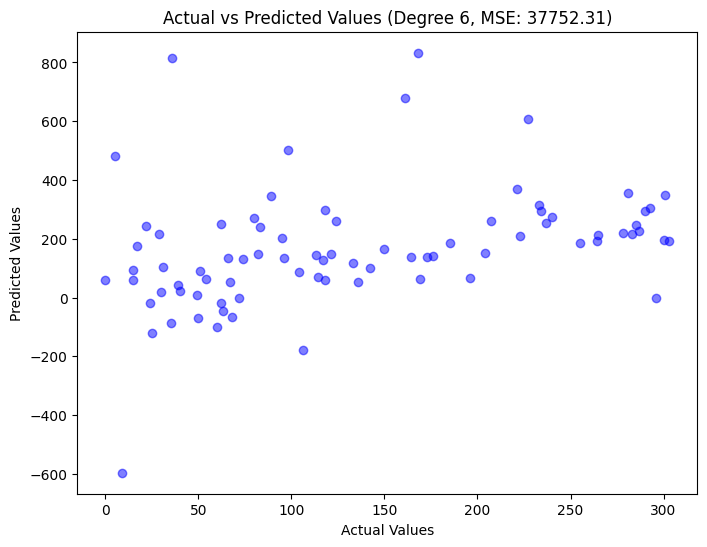

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

degree_to_plot = 6

# Generate polynomial features
poly = PolynomialFeatures(degree=degree_to_plot)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Plot Actual vs Predicted Values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f'Actual vs Predicted Values (Degree {degree_to_plot}, MSE: {mse:.2f})')
plt.show()


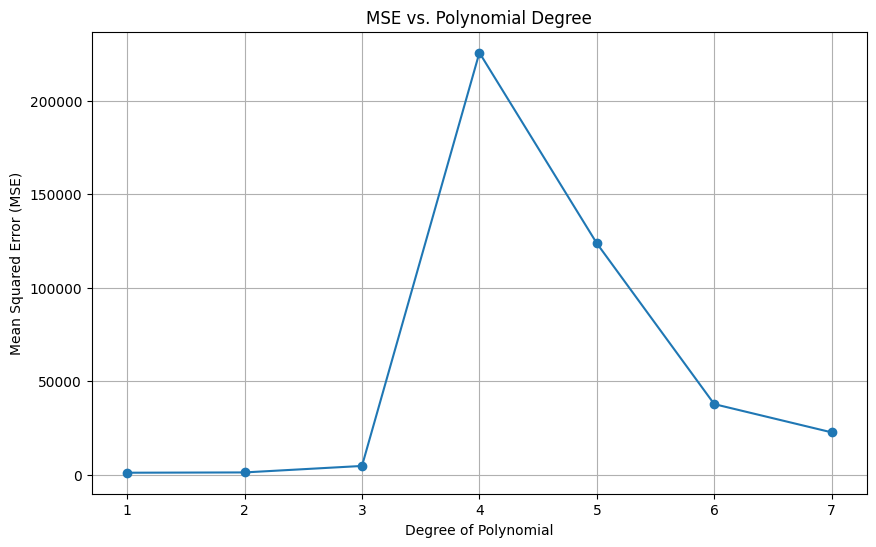

In [18]:
import matplotlib.pyplot as plt

mse_values = []
degrees = range(1, 8)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_values, marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Polynomial Degree')
plt.grid(True)
plt.show()